# Products analysis

**Objective**

Find `product categories` that repeatedly `underperform` vs. others, and understand the reasons behind.   
This will help to formulate recommendations about how to improve Olist's profit margin for the future.

In [3]:
# import modules 

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

from olistpackage.product import Product

In [4]:
# magic commands

%load_ext autoreload
%autoreload 2

In [5]:
# instantiate Product class
# and import the training data
product = Product()
products = product.get_training_data()

In [7]:
# check the shape of products dataframe
products.shape

(31484, 20)

In [8]:
# Five first rows of sellers dataframe
products.head()

,product_id,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,category,wait_time,price,share_of_one_stars,share_of_five_stars,review_score,cost_of_reviews,n_orders,quantity,sales,revenues,profits
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,3.017639,10.910000,0.0,1.0,5.0,0,1,1,10.91,1.091,1.091
1,6a2fb4dd53d2cdb88e0432f1284a004c,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery,10.275272,16.900000,0.0,0.5,3.5,50,2,2,33.80,3.380,-46.620
2,0d009643171aee696f4733340bc2fdd0,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery,13.479699,325.627273,0.2,0.4,3.7,240,10,11,3581.90,358.190,118.190
3,b1eae565a61935e0011ee7682fef9dc9,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery,21.219062,399.900000,0.0,0.0,2.0,50,1,1,399.90,39.990,-10.010
4,8da90b37f0fb171b4877c124f965b1f6,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery,8.965984,137.900000,0.0,1.0,5.0,0,1,1,137.90,13.790,13.790


**`products dataset` features:**
  
| feature_name                 	| type  	| description                                                               	|
|:------------------------------	|:-------:	|:---------------------------------------------------------------------------	|
| `product_id`                 	| str   	| id of the product **UNIQUE**                                              	|
| `category`                   	| str   	| category name (in English)                                                	|
| `product_name_length`        	| float 	| number of characters of a product name                                    	|
| `product_description_length` 	| float 	| number of characters of a product description                             	|
| `product_photos_qty`         	| int   	| number of photos available for a product                                  	|
| `product_weight_g`           	| float 	| weight of the product                                                     	|
| `product_length_cm`          	| float 	| length of the product                                                     	|
| `product_height_cm`          	| float 	| height of the product                                                     	|
| `product_width_cm`           	| float 	| width of the product                                                      	|
| `price`                      	| float 	| average price at which the product is sold                                	|
| `wait_time`                  	| float 	| average wait time (in days) for orders in which the product was sold      	|
| `share_of_five_stars`        	| float 	| share of five-star review_scores for orders in which the product was sold 	|
| `share_of_one_stars`         	| float 	| share of one-star review_scores for orders in which the product was sold  	|
| `review_score`               	| float 	| average review score of the orders in which the product was sold          	|
| `cost_of_reviews` 	| int 	| estimated cost of review in BRL (see below) 	| 
| `n_orders`                   	| int   	| number of orders in which the product appears                             	|
| `quantity`                   	| int   	| total number of products sold for each product_id                         	|
| `sales`                      	| int   	| total sales (in BRL) for each product_id                                  	|
| `revenues` 	| float 	| total of the monthly fees (80) and sales cut (10%) for this seller, in BRL	|  
| `profits`  	| float 	| revenus minus the cost of reviews for this seller, in BRL	|  

Estimated cost of review, in BRL:   

| review score 	| cost 	|
|:---	|:---:|
| 1 	| 100 	|  
| 2 	| 50 	|  
| 3 	| 40 	|  
| 4 	| 0 	|  
| 5 	| 0 	|   

In [11]:
products.dtypes

product_id                     object
product_name_length           float64
product_description_length    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
category                       object
wait_time                     float64
price                         float64
share_of_one_stars            float64
share_of_five_stars           float64
review_score                  float64
cost_of_reviews                 int64
n_orders                        int64
quantity                        int64
sales                         float64
revenues                      float64
profits                       float64
dtype: object

## 1 - Exploratory Data Analysis

In [12]:
products.describe()

,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,wait_time,price,share_of_one_stars,share_of_five_stars,review_score,cost_of_reviews,n_orders,quantity,sales,revenues,profits
count,31484.000000,31484.000000,31484.000000,31483.000000,31483.000000,31483.000000,31483.000000,31482.000000,31484.000000,31484.000000,31484.000000,31484.000000,31484.000000,31484.000000,31484.000000,31484.000000,31484.000000,31484.000000
mean,48.538400,771.741075,2.190255,2268.195725,30.818505,16.890354,23.179208,12.118921,144.688493,0.111190,0.590121,4.110042,51.171389,3.178059,3.492568,419.636344,41.963634,-9.207754
std,10.203237,635.107925,1.739164,4259.290012,16.899559,13.589772,12.043880,8.274009,243.425594,0.268226,0.420677,1.148203,173.864122,9.595536,10.788050,1390.801036,139.080104,136.741432
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.022269,0.850000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2.200000,0.220000,-4877.444000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000,7.141565,39.900000,0.000000,0.000000,3.750000,0.000000,1.000000,1.000000,59.990000,5.999000,-32.020000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000,10.455684,79.000000,0.000000,0.666667,4.500000,0.000000,1.000000,1.000000,139.500000,13.950000,5.900000
75%,57.000000,974.000000,3.000000,1900.000000,38.000000,20.000000,30.000000,14.909019,154.900000,0.000000,1.000000,5.000000,50.000000,2.000000,3.000000,332.210000,33.221000,17.890000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,195.634016,6735.000000,1.000000,1.000000,5.000000,9180.000000,467.000000,527.000000,63885.000000,6388.500000,4639.934000


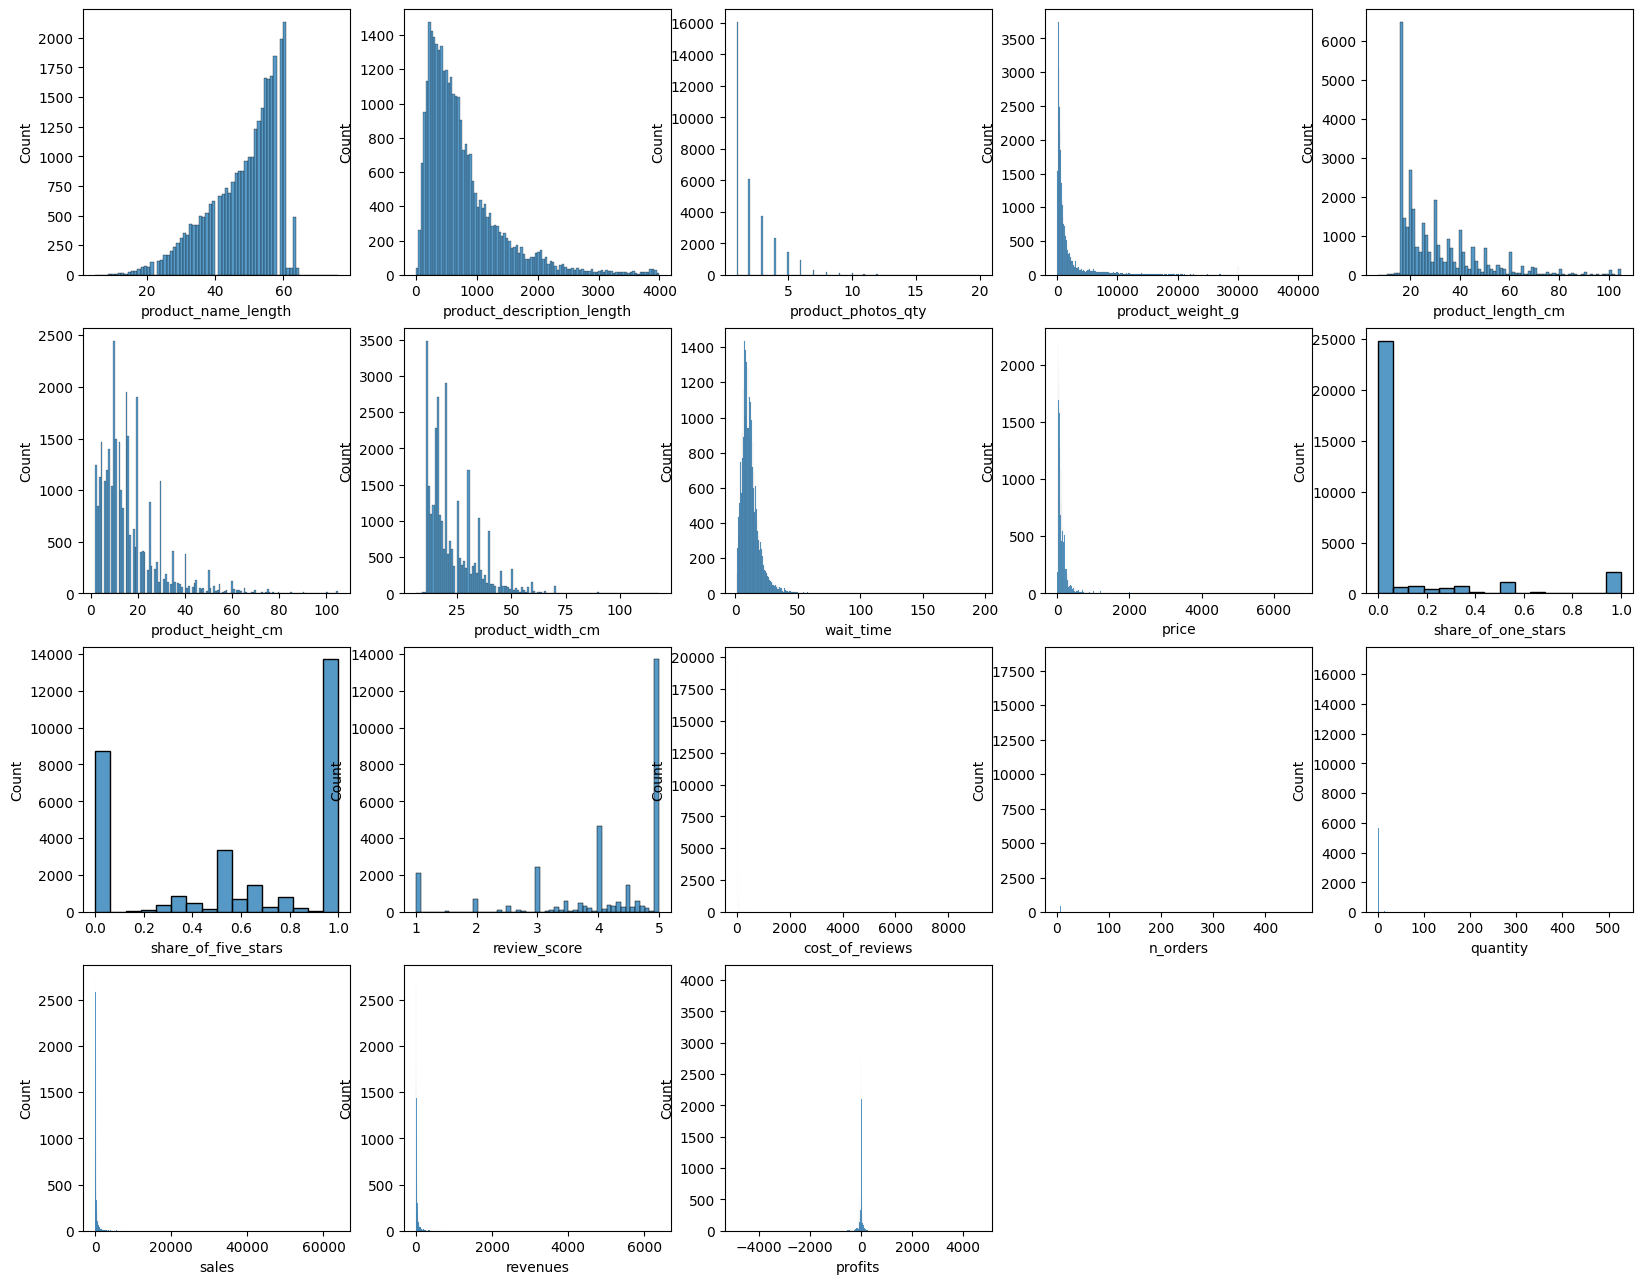

In [15]:
# plotting histograms of each variable of products dataframe

plt.figure(figsize=(20,20))
for (i, col) in enumerate(products.set_index('product_id').drop(columns='category').columns):
    plt.subplot(5,5,i+1)
    sns.histplot(products[col])

## 2 - Predicting the  average `review_score` per `product_id` using a `multivariate-OLS` from `statsmodels`

In [18]:
# The volume of a product is easy to compute
# and it will probably play a role on the review score
# as a bulky object is harder to ship

products['product_volume_cm3'] = products["product_length_cm"] * products["product_height_cm"] * products["product_width_cm"]

In [20]:
# Defining our target
target = "review_score"

In [22]:
# features do we have access to:
set(products.columns) - set(target)

{'category',
 'cost_of_reviews',
 'n_orders',
 'price',
 'product_description_length',
 'product_height_cm',
 'product_id',
 'product_length_cm',
 'product_name_length',
 'product_photos_qty',
 'product_volume_cm3',
 'product_weight_g',
 'product_width_cm',
 'profits',
 'quantity',
 'revenues',
 'review_score',
 'sales',
 'share_of_five_stars',
 'share_of_one_stars',
 'wait_time'}

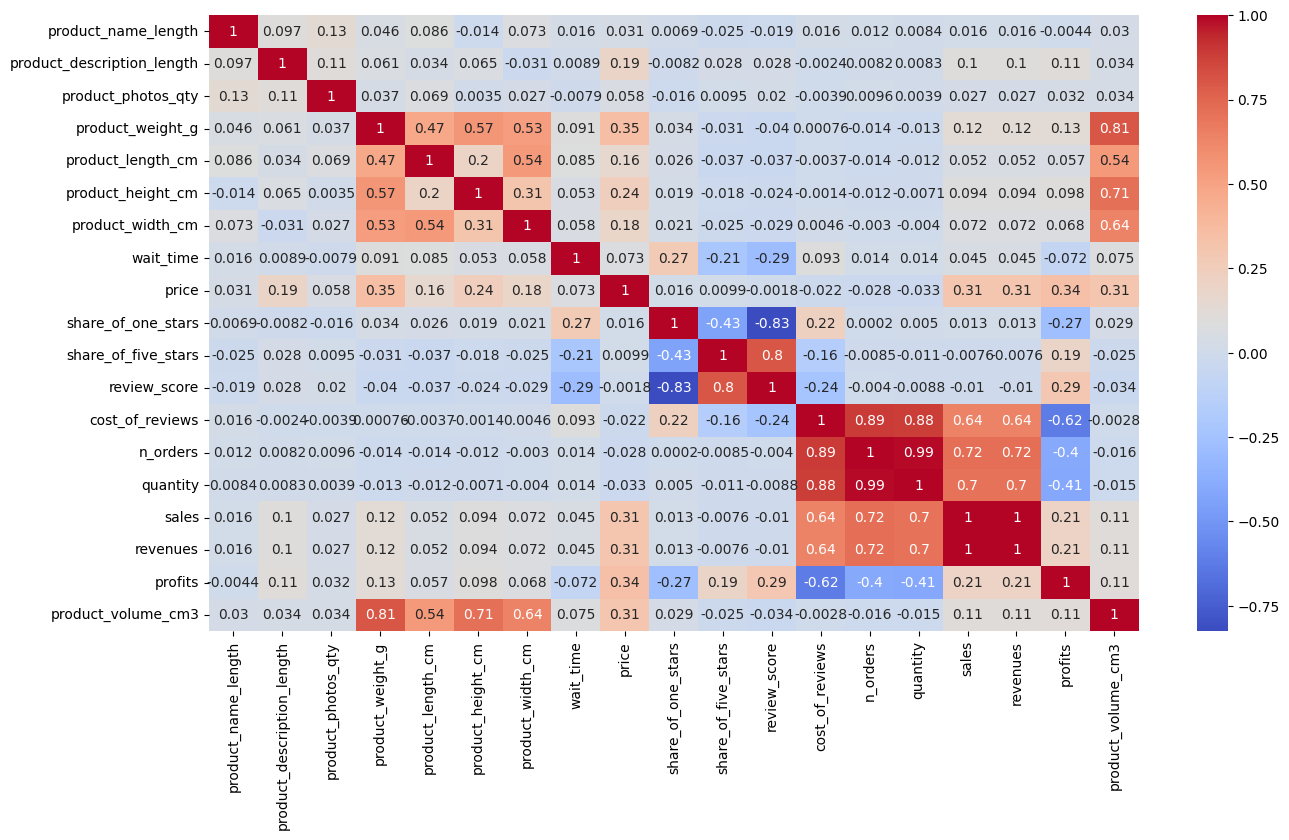

In [29]:
# linear correalation between the features
plt.figure(figsize = (15,8))
sns.heatmap(products.corr(), 
            cmap='coolwarm',
            annot_kws={"size": 10},
            annot = True);

List of interesting features for running an OLS:
* `product_photos_qty` : the more pictures available, the more likely you will make the decision to purchase it
* `product_volume_cm3` : it is faster to ship a smartphone cable than a convertible sofa...
* `wait_time` : are Olist' customers patient ?
* `price` : how does the price of a product influence a customer's satisfaction ?
* `quantity` : it might indicate whether a product is popular or not

In [41]:
products_selected_features = [
    'product_photos_qty',
    'product_volume_cm3',
    'wait_time',
    'price',
    'quantity'  
]

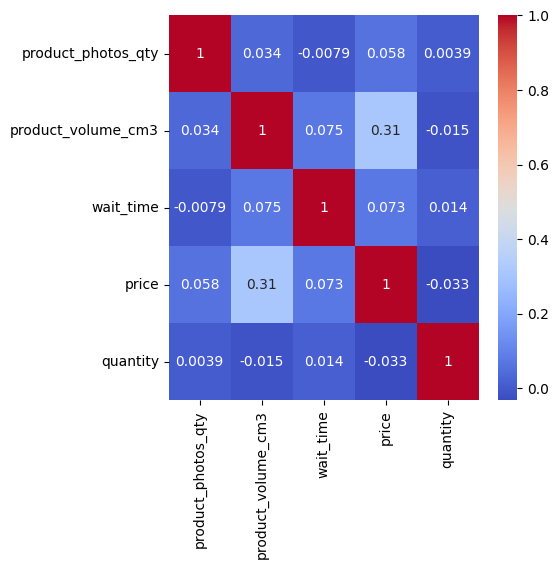

In [46]:
#Check if the features are not too correlated pairwise:

plt.figure(figsize = (5,5))
sns.heatmap(products[products_selected_features].corr(),
           cmap="coolwarm",
           annot=True,
           annot_kws={"size": 10});